# Natural Language Processing (NLP)

## Data Science Unit 4 Sprint 1 Assignment 1

### ***Initial Data Exploration and Clean-Up***

In [2]:
%pwd

'C:\\Users\\kjshe\\OneDrive\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
# Importing pandas and reading in the csv

import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Creating rating feature from star_rating using only numbers

shops['rating'] = shops['star_rating'].apply(lambda x: x[:4]).astype('float')
del shops['star_rating']

In [5]:
# Creating date feature from date stripped from full_review_text

shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])

In [6]:
# Dropping data from full_review_text by splitting and indexing past the date and re-joining with a space

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))

In [7]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

In [8]:
shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in they are located within the northcr...,4.0,12/3/2016


### ***Lemmatizaion function and tokenization, removes stop word, punctuation and pronouns.***

In [9]:
# Import spacy and load the model

import spacy

nlp = spacy.load('en_core_web_lg')

In [10]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)

    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas
        

In [11]:
shops['tokens'] = shops['full_review_text'].apply(get_lemmas)

In [12]:
shops['tokens']

0       [1, check, love, love, love, atmosphere, corne...
1       [list, date, night, austin, ambiance, austin, ...
2       [1, check, list, brunch, spot, love, eclectic,...
3       [cool, decor, good, drink, nice, seating, over...
4       [1, check, locate, northcross, mall, shopping,...
                              ...                        
7611    [actually, step, restaurant, chance, favorite,...
7612    [ok, steeping, room, awesome, great, menu, ite...
7613    [love, come, tea, atmosphere, pretty, fresh, o...
7614    [food, average, booth, feel, clean, waitstaff,...
7615    [finally, stop, lunch, colleague, glad, delici...
Name: tokens, Length: 7616, dtype: object

In [13]:
# Code from lecture 

from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
# Word count data for top 5 tokens
wc = count(shops['tokens'])

In [15]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,coffee,4953,10763,1.0,0.029758,0.029758,0.650341
134,place,3892,6059,2.0,0.016752,0.046511,0.511029
166,good,3606,5421,3.0,0.014988,0.061499,0.473477
121,great,2860,3959,4.0,0.010946,0.072445,0.375525
13,check,3174,3468,5.0,0.009589,0.082034,0.416754


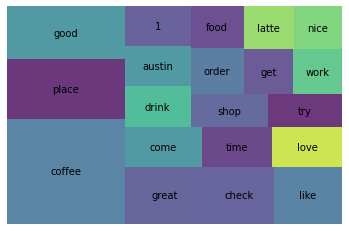

In [16]:
# Word cloud with top 20 words after cleaning

import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### ***Layer the Star Rating into Visualizations***

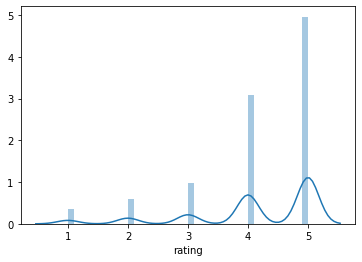

In [17]:
import seaborn as sns
sns.distplot(shops['rating']);

A 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings.

A 'good' coffee shop is a 4 or 5.

In [18]:
# Setting variable for 'bad' coffee shops

wc_bad = count(shops[shops['rating'] < 4]['tokens'])

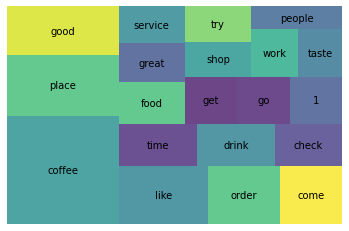

In [19]:
# Word Cloud (top 20) for Comments for coffee shops rated 'bad'

wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [20]:
# Setting variable for 'good' coffee shops

wc_good = count(shops[shops['rating'] <= 4]['tokens'])

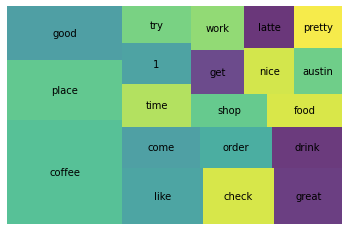

In [21]:
# Word Cloud (top 20) for Comments for coffee shops rated 'good'

wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [22]:
# Outer Join on word the wc tables for coffee shops that rate 'good' and those that rate 'bad'

diff = wc_good[['word', 'appears_in_pct']].merge(wc_bad[['word', 'appears_in_pct']], on='word', how='outer', suffixes=('', '_bad'))

In [23]:
diff.head()

,word,appears_in_pct,appears_in_pct_bad
0,coffee,0.666840,0.644309
1,place,0.528154,0.512195
2,good,0.491397,0.439702
3,like,0.358968,0.403794
4,check,0.445516,0.330623


In [25]:
# Make a df that shows the difference betwee words that appear in both groups

diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']
diff.sort_values(by='diff')

,word,appears_in_pct,appears_in_pct_bad,diff
25,service,0.175443,0.235095,-0.059652
69,ask,0.089416,0.149051,-0.059635
7,order,0.234619,0.293360,-0.058741
84,customer,0.073775,0.126016,-0.052241
96,bad,0.082899,0.132114,-0.049215
...,...,...,...,...
10970,nashville,0.000261,NaN,NaN
10971,actuality,0.000261,NaN,NaN
10972,crass,0.000261,NaN,NaN
10973,digestion,0.000261,NaN,NaN


# TODO: Markdown part of the assignment 

3. Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. 

4. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. 

**There should be plenty of markdown cells!**

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count - Done
- View Counts by Rating - Done


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences